Import Library yang Diperlukan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Mendapatkan dan Mempersiapkan Dataset MNIST

In [5]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Pra-Pengolahan Data

In [6]:
# Normalisasi data: Mengubah rentang [0, 255] menjadi [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images: Mengubah gambar 2D (28x28) menjadi 1D (784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

Pemilihan Fitur (Opsional)

In [7]:
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# 5. Membangun Model ANN
model = keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train_pca.shape[1],)))  # Menggunakan jumlah fitur setelah PCA
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\cinthya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Membangun Model ANN

In [8]:
model = keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(x_train_pca.shape[1],)))  # Menggunakan jumlah fitur setelah PCA
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Melatih Model

In [9]:
history = model.fit(x_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8323 - loss: 0.5668 - val_accuracy: 0.9597 - val_loss: 0.1391
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9648 - loss: 0.1180 - val_accuracy: 0.9666 - val_loss: 0.1099
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9762 - loss: 0.0774 - val_accuracy: 0.9712 - val_loss: 0.0966
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9828 - loss: 0.0557 - val_accuracy: 0.9747 - val_loss: 0.0891
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0440 - val_accuracy: 0.9764 - val_loss: 0.0875
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9887 - loss: 0.0361 - val_accuracy: 0.9735 - val_loss: 0.0933
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0302 - val_accuracy: 0.9771 - val_loss: 0.0830
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9921 - loss: 0.0248 - 

Evaluasi Model

In [10]:
test_loss, test_accuracy = model.evaluate(x_test_pca, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9725 - loss: 0.0995
Test accuracy: 0.9770


Confusion Matrix dan Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


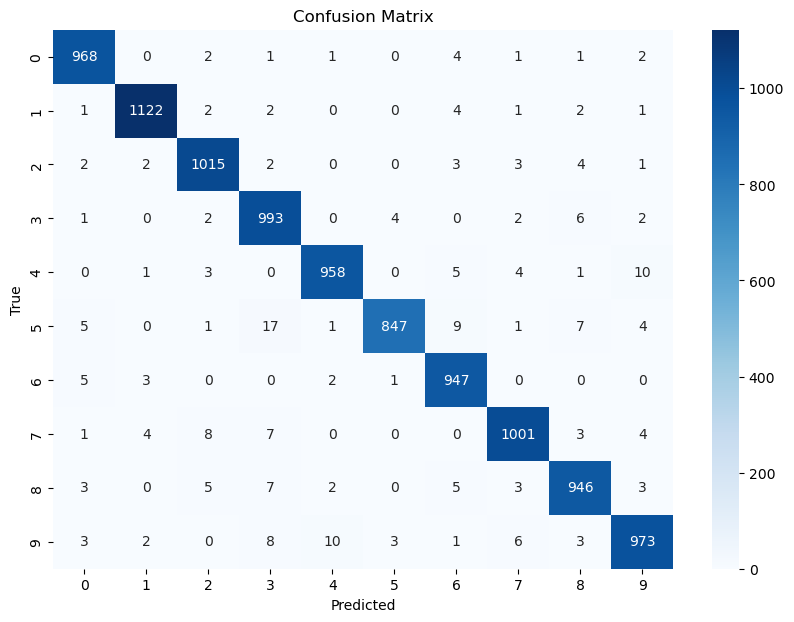

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [12]:
y_pred = model.predict(x_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes))